<a href="https://colab.research.google.com/github/scottspurlock/csc4466-s2024/blob/main/projects/project05_recognition_testing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Project 5: Recognition
## Testing Demo
This notebook shows how to download and unzip the test images, visualize a few of them, and predict them with a model.

Note that the test images are provided to see how well your model generalizes to new, unseen data, so you shouldn't use them for training.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# fruit: 'https://drive.google.com/uc?export=download&id=1QKd0s5CAnHrZWTEpByUny_JHK66kcYCu'

# Download and unzip.
# Should create 3 folders.
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1QKd0s5CAnHrZWTEpByUny_JHK66kcYCu',
                                    dest_path='/content/test_fruit.zip',
                                    unzip=True)

In [3]:
# set these to whatever your model expects as input
img_height, img_width = 224, 224

test_ds = tf.keras.utils.image_dataset_from_directory(
  'cv_project05_test_images',
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=30)


Found 30 files belonging to 3 classes.


In [4]:
# The class names (the names of the different types of images) are
# automatically inferred from the folder names.
class_names = test_ds.class_names
print(class_names)

['apple', 'banana', 'orange']


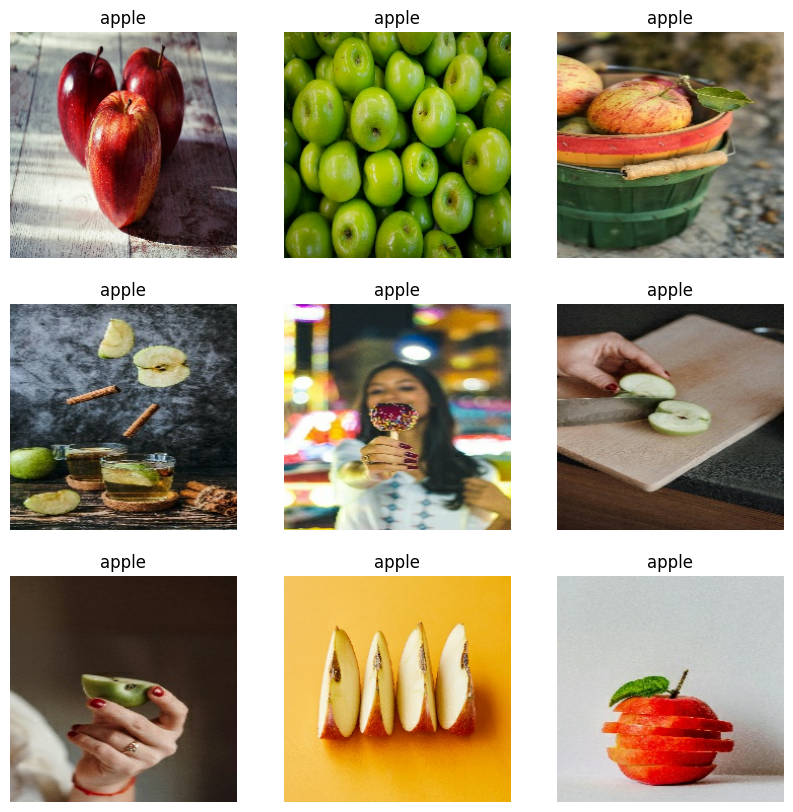

In [5]:
# visualize test images
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## Testing a model with the test data
Below is a super simple model. I'm not even going to bother training it, so its weights are just random numbers. You will, of course, get better results with a better model architecture and actually training the model on your own training data.

**Do not use the test data to train your model.** We're saving it to see how well the model generalizes at that end.

In [6]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 3)                 451587    
                                                                 
Total params: 451587 (1.72 MB)
Trainable params: 451587 (1.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predicting the test data with the model
This gives us a 30x3 matrix. 30 rows for the 30 test images, and 3 columns for the 3 classes (apple, banana, orange).

In [7]:
# Predict the image with the model
predictions = model.predict(test_ds)
predictions.shape

1/1 [==============================] - 0s 295ms/step


(30, 3)

In [8]:
# pick the max column in each row as the predicted class index (0, 1, or 2),
# which corresponds to apple, banana, or orange.
ypred = np.argmax(predictions, axis=1)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# the actual class labels should be 10 apples, 10 bananas, and 10 oranges:
ytest = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# the classification report tells us how well we did.
# you'll see warnings when the model never predicted one or more classes.
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53        10
           1       0.00      0.00      0.00        10
           2       0.50      0.10      0.17        10

    accuracy                           0.37        30
   macro avg       0.29      0.37      0.23        30
weighted avg       0.29      0.37      0.23        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
